In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def llamadas_servicio(n, media_llamadas, media_atencion_db1, media_atencion_db2 = None, p = 1):
    '''
    Simula llamadas a servidores que serán atendidas por una o dos bases de datos.
    Si no se indica el parametro "media_atencion_db2" se usa una sola base de datos.
    Si se indica el parametro, se puede indicar la probabilidad "p" que determina la 
        probabilidad de que una llamada sea atendida por la base de datos 1. Y "1-p"
        será la probabilidad de que sea atendida por la base de datos 2.
    '''
    if p > 1:
        raise Exception('La probabilidad p debe ser menor o igual a 1')
    if media_atencion_db2 == None and p != 1:
        raise Exception('La probabilidad p no puede ser distinto de 1 si no se especifica la media de la segunda base de datos')
        
    t_actual = 0
    t_espera_acumulado = 0
    t_libre_acumulado = 0
    llamados_sin_esperar = 0
    
    llamadas = np.random.exponential(media_llamadas, n).cumsum()
    
    for i in range(n):
        t_llamada_i = llamadas[i]
        t_espera_i = t_actual - t_llamada_i
        
        if t_espera_i > 0: # tuvo que esperar
            t_espera_acumulado += t_espera_i
            
        else: # no hay espera, el sistema estuvo libre
            t_libre_acumulado += -1*t_espera_i
            llamados_sin_esperar += 1

        u = np.random.random()
        if u < p:
            t_demora = np.random.exponential(media_atencion_db1) 
        else:
            t_demora = np.random.exponential(media_atencion_db2) 
            
        t_actual = t_llamada_i + t_demora
    
    ret = {
        'espera_total': t_espera_acumulado,
        'espera_total_promedio': t_espera_acumulado / n,
        'libre_total':  t_libre_acumulado,
        'libre_total_promedio': t_libre_acumulado / n,
        'sin_esperar': llamados_sin_esperar,
        'sin_esperar_probabilidad': llamados_sin_esperar / n
    }
    
    return ret

In [3]:
simulacion_alternativa1 = llamadas_servicio(100_000, 4, 0.7, 1, 0.7)
simulacion_alternativa2 = llamadas_servicio(100_000, 4, 0.8)

Text(0, 0.5, 'Tiempo promedio en segundos')

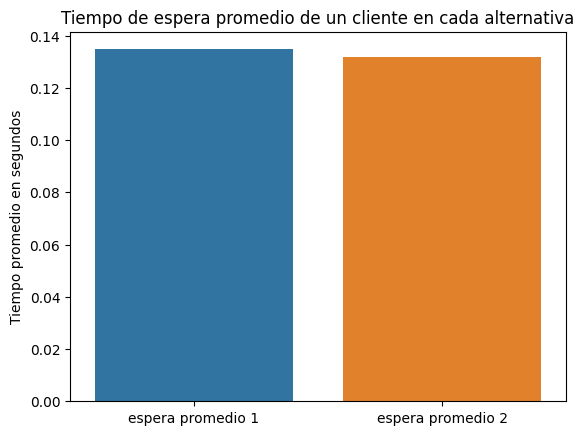

In [4]:
esperas = [
    simulacion_alternativa1['espera_total_promedio'],
    simulacion_alternativa2['espera_total_promedio']
]
grf = sns.barplot(x=['espera promedio 1','espera promedio 2'], y=esperas)
grf.set_title('Tiempo de espera promedio de un cliente en cada alternativa')
grf.set_ylabel('Tiempo promedio en segundos')

Text(0, 0.5, 'Tiempo promedio en segundos')

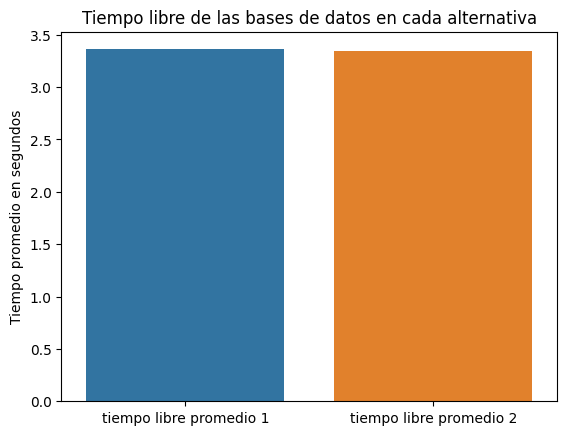

In [5]:
libre = [
    simulacion_alternativa1['libre_total_promedio'],
    simulacion_alternativa2['libre_total_promedio']
]
grf = sns.barplot(x=['tiempo libre promedio 1','tiempo libre promedio 2'], y=libre)
grf.set_title('Tiempo libre de las bases de datos en cada alternativa')
grf.set_ylabel('Tiempo promedio en segundos')

Text(0, 0.5, 'Tiempo promedio en segundos')

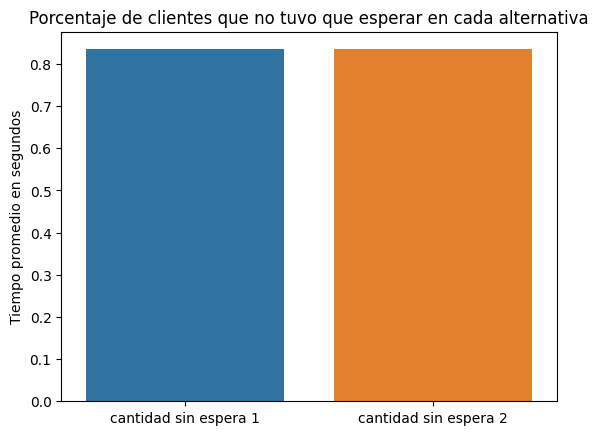

In [6]:
sin_espera = [
    simulacion_alternativa1['sin_esperar_probabilidad'],
    simulacion_alternativa2['sin_esperar_probabilidad']
]
grf = sns.barplot(x=['cantidad sin espera 1','cantidad sin espera 2'], y=sin_espera)
grf.set_title('Porcentaje de clientes que no tuvo que esperar en cada alternativa')
grf.set_ylabel('Tiempo promedio en segundos')